# 3.1 Support Vector Machine (SVM)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

%matplotlib inline

Specify the data file you want to load. Here I load a npz-file with 15 classes created with the <u>"2.1 Data Preparation - Split-Train-Test.ipynb"</u> - notebook

In [4]:
npzfile = np.load('../data/image_data_10.npz')

In [5]:
X = npzfile['arr_0']
y = npzfile['arr_1']

In [6]:
# reshape 
X = np.reshape(X, (X.shape[0], X.shape[1]*X.shape[2]*X.shape[3]))

In [7]:
# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# define grid for gridsearch
C_range = np.logspace(-2, 1, 4)
gamma_range = np.logspace(-3, 1, 4)
kernel_range = ['rbf', 'linear']
param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel_range)

In [7]:
# find the best parameters for the model
grid = GridSearchCV(
    SVC(), 
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=3),
    n_jobs=4,
    verbose=1000)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Memmaping (shape=(1212, 67500), dtype=float64) to new file C:\Users\flori\AppData\Local\Temp\joblib_memmaping_pool_14152_2370023194128\14152-2370080292592-2898dbb030e98a4a31c8c039fc3d6992.pkl
Pickling array (shape=(1212,), dtype=int32).
Pickling array (shape=(806,), dtype=int32).
Pickling array (shape=(406,), dtype=int32).
Memmaping (shape=(1212, 67500), dtype=float64) to old file C:\Users\flori\AppData\Local\Temp\joblib_memmaping_pool_14152_2370023194128\14152-2370080292592-2898dbb030e98a4a31c8c039fc3d6992.pkl
Pickling array (shape=(1212,), dtype=int32).
Pickling array (shape=(808,), dtype=int32).
Pickling array (shape=(404,), dtype=int32).
Memmaping (shape=(1212, 67500), dtype=float64) to old file C:\Users\flori\AppData\Local\Temp\joblib_memmaping_pool_14152_2370023194128\14152-2370080292592-2898dbb030e98a4a31c8c039fc3d6992.pkl
Pickling array (shape=(1212,), dtype=int32).
Pickling array (shape=(810,), dtype=int32).
Pickling

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'kernel': ['rbf', 'linear'], 'gamma': array([  1.00000e-03,   2.15443e-02,   4.64159e-01,   1.00000e+01]), 'C': array([  0.01,   0.1 ,   1.  ,  10.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1000)

In [10]:
# {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
grid.best_params_

{'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}

In [9]:
# use the best parameters for the model
best_C = 0.01
best_gamma = 0.001
best_kernel = 'linear'

In [10]:
# fit the model with the best parameters
clf = SVC(C=best_C, gamma=best_gamma)
clf.fit(X_train, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
# score on test data
clf.score(X_test, y_test)

0.1617161716171617

In [12]:
# score on training data
clf.score(X_train, y_train)

0.18894389438943895

In [13]:
y_pred = clf.predict(X_test)

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 0  0  0  0  0  0  0  0  0  0 19]
 [ 0  0  0  0  0  0  0  0  0  0 14]
 [ 0  0  0  0  0  0  0  0  0  0 31]
 [ 0  0  0  0  0  0  0  0  0  0 30]
 [ 0  0  0  0  0  0  0  0  0  0 31]
 [ 0  0  0  0  0  0  0  0  0  0 10]
 [ 0  0  0  0  0  0  0  0  0  0 15]
 [ 0  0  0  0  0  0  0  0  0  0 51]
 [ 0  0  0  0  0  0  0  0  0  0 22]
 [ 0  0  0  0  0  0  0  0  0  0 31]
 [ 0  0  0  0  0  0  0  0  0  0 49]]


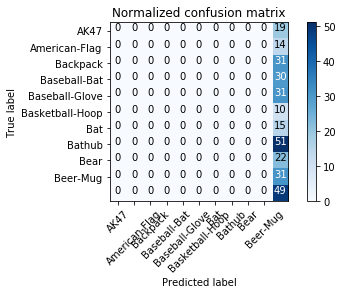

In [24]:
cnf_matrix = confusion_matrix(y_test, y_pred)
#np.set_printoptions(precision=2)

class_names = ['AK47', 'American-Flag', 'Backpack', 'Baseball-Bat', 
               'Baseball-Glove', 'Basketball-Hoop', 'Bat', 'Bathub',
               'Bear', 'Beer-Mug']

# Plot normalized confusion matrix
#plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                      title='Normalized confusion matrix')

plt.show()